In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv(r'D:\Term6\Machine Learning\Homework\fer2013.csv')
z=[]
x=df['pixels']
for x_temp in x:
    list_temp=list(map(int,x_temp.split()))
    z.append(list_temp)
features=pd.DataFrame(z)
scaler =StandardScaler().fit(features)
features_scaled = scaler.transform(features)
labels=df['emotion']
use=df['Usage']
features_scaled=pd.DataFrame(features_scaled)

In [3]:
dff=result = pd.concat([features_scaled, labels,use], axis=1, join='inner')
dff

0         1         2         3         4         5         6  \
0     -0.606470 -0.456207 -0.401105 -0.504562 -0.670675 -0.665695 -0.641047   
1      0.375875  0.407967  0.414223  0.557216  0.506432  0.337948  0.056796   
2      1.346093  1.173378  0.527114  0.672349  0.846485  0.404857  0.740955   
3     -1.164345 -1.048783 -0.978106 -1.041847 -1.010728 -1.134061 -1.202057   
4     -1.406899 -1.443834 -1.429672 -1.425622 -1.429254 -1.441845 -1.462038   
...         ...       ...       ...       ...       ...       ...       ...   
35882 -0.849024 -0.999402 -1.216432 -1.144187 -1.128438 -1.053770 -1.010492   
35883  0.703324  0.704255  0.727810  0.787481  0.938037  1.073952  1.151451   
35884 -1.249239 -1.233963 -1.228976 -1.131394 -1.063043 -1.147443 -1.202057   
35885 -1.091578 -1.098165 -1.078454 -1.054639 -1.023807 -1.040388 -0.887344   
35886 -1.224983 -1.283345 -1.254063 -1.272112 -1.259228 -1.227734 -1.174691   

              7         8         9  ...      2296      2297      2298  \
0     -0.608718 -0.756215 -0.730926  ...  1.010337  0.352180 -0.062731   
1      0.466766  0.893108  0.941302  ... -0.206225 -0.028694 -0.116259   
2      0.927688  1.063728  1.316111  ...  0.581775  0.161743  0.044325   
3     -1.209313 -1.097454 -0.975994  ...  0.305284  0.297769  0.298583   
4     -1.488659 -1.524003 -1.567040  ... -1.090996 -1.076096 -1.066379   
...         ...       ...       ...  ...       ...       ...       ...   
35882 -0.943934 -1.040581 -1.033657  ...  1.466547  1.453993  1.476197   
35883  1.221002  1.262784  1.301695  ...  0.360582  0.107333 -0.598010   
35884 -1.251215 -1.168546 -1.192231  ...  1.148582  1.127530  1.114883   
35885 -0.538881 -0.400757 -0.399364  ... -1.146295 -1.144109 -1.106525   
35886 -1.027738 -0.813088 -0.745342  ...  1.369775  1.154735  0.539458   

           2299      2300      2301      2302      2303  emotion        Usage  
0      0.065810 -0.218377 -0.087146 -0.057888 -0.411975        0     Training  
1     -0.582313  0.774692  1.035376  0.889117  0.883013        0     Training  
2     -0.132595 -0.192244 -0.319392 -0.045090  0.476742        2     Training  
3      0.330350  0.356557  0.377346  0.377223  0.349783        4     Training  
4     -1.111393 -1.054646 -1.067739 -1.081677 -1.072166        6     Training  
...         ...       ...       ...       ...       ...      ...          ...  
35882  1.467873  1.414960  1.422452  1.375417  1.289284        6  PrivateTest  
35883 -1.375933 -1.459714 -1.454816 -1.452800 -1.453045        3  PrivateTest  
35884  0.780068  0.474158  0.532177  0.249249 -0.018400        0  PrivateTest  
35885 -1.005577 -1.002380 -1.003226 -1.068879 -1.097557        3  PrivateTest  
35886 -0.159049  0.448024  0.983766  1.093875  1.098845        2  PrivateTest  

[35887 rows x 2306 columns]

In [11]:
df_train=dff.loc[dff['Usage'] == "Training"]
df_test=dff.drop(dff.index[dff['Usage'] =="Training"])

In [20]:
x_train=df_train.drop(['Usage','emotion'], axis = 1)
x_test=df_test.drop(['Usage','emotion'], axis = 1)
y_train=df_train['emotion']
y_test=df_test['emotion']


In [21]:
x_train.to_csv(r'C:\Users\admin\OneDrive\Desktop\HW5\x_train.csv')
y_train.to_csv(r'C:\Users\admin\OneDrive\Desktop\HW5\y_train.csv')
x_test.to_csv(r'C:\Users\admin\OneDrive\Desktop\HW5\x_test.csv')
y_test.to_csv(r'C:\Users\admin\OneDrive\Desktop\HW5\y_test.csv')

In [32]:
x_train_mat=np.array(x_train).T
x_test_mat=np.array(x_test).T

In [23]:
cov_mat=np.cov(x_train_mat)
eigen_value,eigen_vect=LA.eig(cov_mat)
eigen_value=abs(eigen_value)
eigen_value

array([6.71283478e+02, 2.13687429e+02, 2.09443073e+02, ...,
       5.96239155e-03, 6.00717938e-03, 6.03043863e-03])

In [28]:
eigen_value_sorted=np.flip(np.sort(eigen_value))
sorted_index = np.argsort(eigen_value)[::-1]
eigen_vector_sorted = eigen_vect[:,np.argsort(eigen_value)[::-1]]
print("sorted eigen values:")
print(eigen_value_sorted)
print("sorted eigen vectors:")
print(eigen_vector_sorted)

sorted eigen values:
[6.71283478e+02 2.13687429e+02 2.09443073e+02 ... 1.08665071e-03
 1.06719296e-03 1.03859750e-03]
sorted eigen vectors:
[[ 0.01550497  0.02850439  0.00762017 ... -0.00720105  0.01664667
  -0.00500058]
 [ 0.01551229  0.02991414  0.00849129 ...  0.00497142 -0.01453228
  -0.00122715]
 [ 0.01569838  0.03096828  0.00938779 ... -0.00349039  0.00450618
   0.00440165]
 ...
 [ 0.0160525   0.02071641 -0.01913864 ...  0.0064761  -0.00358275
   0.0023539 ]
 [ 0.01593888  0.02110481 -0.01819196 ... -0.00556933  0.00253355
   0.00087669]
 [ 0.01580121  0.02099258 -0.01740834 ...  0.0033231   0.00093094
  -0.0004754 ]]


In [25]:
dimension=np.arange(1,len(eigen_value_sorted)+1)
plt.plot(dimension,eigen_value_sorted)
plt.xlabel("dimension")
plt.ylabel("eigenvalue")
plt.title("eigenvalue_dimension plot")


Text(0.5, 1.0, 'eigenvalue_dimension plot')

In [26]:
plt.plot(dimension,eigen_value_sorted)
plt.xlabel("dimension")
plt.ylabel("eigenvalue")
plt.title("eigenvalue_dimension plot, zoomed")
plt.xlim([0,15])

(0.0, 15.0)

As we can see, the first 5 eigenvalues are much greater than the rest of the eigenvalues, so we choose 5 components.

#B

In [29]:
print("the first 4 eigen values")
print(eigen_value_sorted[0:4])
print("the first 4 eigen vectors")
print(eigen_vector_sorted[0:4])


the first 4 eigen values
[671.28347777 213.6874287  209.44307338 120.58184847]
the first 4 eigen vectors
[[ 0.01550497  0.02850439  0.00762017 ... -0.00720105  0.01664667
  -0.00500058]
 [ 0.01551229  0.02991414  0.00849129 ...  0.00497142 -0.01453228
  -0.00122715]
 [ 0.01569838  0.03096828  0.00938779 ... -0.00349039  0.00450618
   0.00440165]
 [ 0.0159517   0.03170529  0.01001192 ...  0.00320753 -0.00819012
  -0.00429445]]


In [37]:
w=((eigen_vector_sorted[0:4]))
w

array([[ 0.01550497,  0.02850439,  0.00762017, ..., -0.00720105,
         0.01664667, -0.00500058],
       [ 0.01551229,  0.02991414,  0.00849129, ...,  0.00497142,
        -0.01453228, -0.00122715],
       [ 0.01569838,  0.03096828,  0.00938779, ..., -0.00349039,
         0.00450618,  0.00440165],
       [ 0.0159517 ,  0.03170529,  0.01001192, ...,  0.00320753,
        -0.00819012, -0.00429445]])

The eigenvectors and eigenvalues of a covariance  matrix represent the core of a PCA: The eigenvectors determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

#C

raw data with k=1

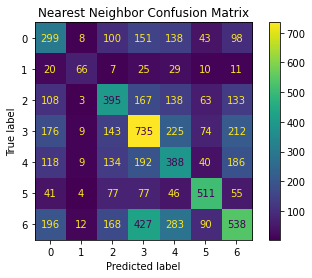

accuracy
0.40847032599609917


In [45]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(x_train,y_train)
y_est=knn1.predict(x_test)
cm = confusion_matrix(y_est,  y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0', '1', '2', '3', '4', '5', '6'])
disp.plot()
plt.title("Nearest Neighbor Reduced Data Confusion Matrix")
plt.show()
print("CCR for nearest neigbors and reduced data")
print(accuracy_score(y_est, y_test))

raw data with k=2:

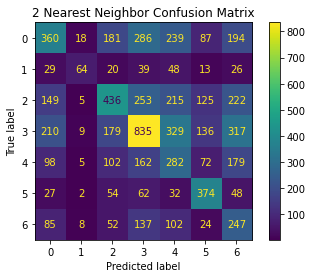

accuracy
0.3619392588464753


In [47]:
knn1 = KNeighborsClassifier(n_neighbors=2)
knn1.fit(x_train,y_train)
y_est=knn1.predict(x_test)
cm = confusion_matrix(y_est,  y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0', '1', '2', '3', '4', '5', '6'])
disp.plot()
plt.title("2 Nearest Neighbor Initail Data Confusion Matrix")
plt.show()
print("CCR for 2 nearest neigbors and initial data ")
print(accuracy_score(y_est, y_test))

Reduced Data

first we project our data on the 4 vectors we calculated in part B

In [52]:
w=eigen_vector_sorted[0:4]
x_train_reduced=np.dot(w,x_train_mat)
x_test_reduced=np.dot(w,x_test_mat)
x_train_reduced=pd.DataFrame(x_train_reduced.T)
x_test_reduced=pd.DataFrame(x_test_reduced.T)

reduced datat with K=1

In [53]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(x_train_reduced,y_train)
y_est=knn1.predict(x_test_reduced)
cm = confusion_matrix(y_est,  y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0', '1', '2', '3', '4', '5', '6'])
disp.plot()
plt.title("Nearest Neighbor Reduced Data Confusion Matrix")
plt.show()
print("CCR for nearest neigbors and reduced data")
print(accuracy_score(y_est, y_test))

accuracy
0.25188074672610755


reduced datat with K=2

In [54]:
knn1 = KNeighborsClassifier(n_neighbors=2)
knn1.fit(x_train_reduced,y_train)
y_est=knn1.predict(x_test_reduced)
cm = confusion_matrix(y_est,  y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0', '1', '2', '3', '4', '5', '6'])
disp.plot()
plt.title("2 Nearest Neighbor Reduced Data Confusion Matrix")
plt.show()
print("CCR for 2 nearest neigbors and reduced data ")
print(accuracy_score(y_est, y_test))

accuracy
0.21983839509612704


#D

In [58]:
accuracy = []
for i in range (150):
    num_components = i+1
    w=eigen_vector_sorted[0:num_components]
    x_train_reduced=np.dot(w,x_train_mat)
    x_test_reduced=np.dot(w,x_test_mat)
    x_train_reduced=pd.DataFrame(x_train_reduced.T)
    x_test_reduced=pd.DataFrame(x_test_reduced.T)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(x_train_reduced, y_train)
    y_est = knn.predict(x_test_reduced)
    accuracy.append(accuracy_score(y_test, y_est))

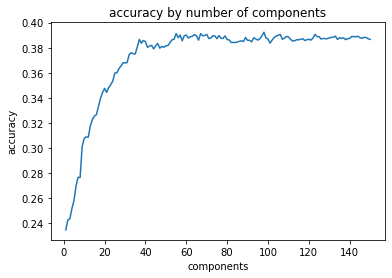

best accuracy 0.39230983560880467best number of components 98


In [61]:
x = np.arange(1,151)
plt.plot(x,accuracy)
plt.xlabel("components")
plt.ylabel("accuracy")
plt.title("accuracy by number of components")
plt.show()
print("best accuracy "+str(max(accuracy))+"best number of components "+str(1+np.argmax(np.array(accuracy))))


We project our data on 1 to 150 vectors and fit our model with reduced data. we get the best accuracy of 39% with 98 dimensions